In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rc('font', **{'size' : 22})

Литература : 
1) https://ru.wikipedia.org/wiki/Метод_Рунге_—_Кутты
2) https://www.overleaf.com/project/63e2082476b64c474faa141b

### Первая задачка 


In [137]:
def f(y):
    return np.array([
        y[1] ,
        -np.sin(y[0])
    ])
def solver1(t,dt) :
    y = np.zeros((len(t),2))
    y[0] = np.array([np.pi/2 , 0.0])
    
    #Условия Рунге Кутты
    y[1] = y[0] + dt*f(y[0])
    y[2] = y[1] + dt*f(y[1])

    # Метод Аддамса
    for n in range(2, len(t) - 1):
        y[n+1] = y[n] + dt/12*(23 * f(y[n]) - 16*f(y[n-1]) + 5*f(y[n-2]))
    return y

1.5708723751730422 0.006465566824138687


<Figure size 1000x1000 with 0 Axes>

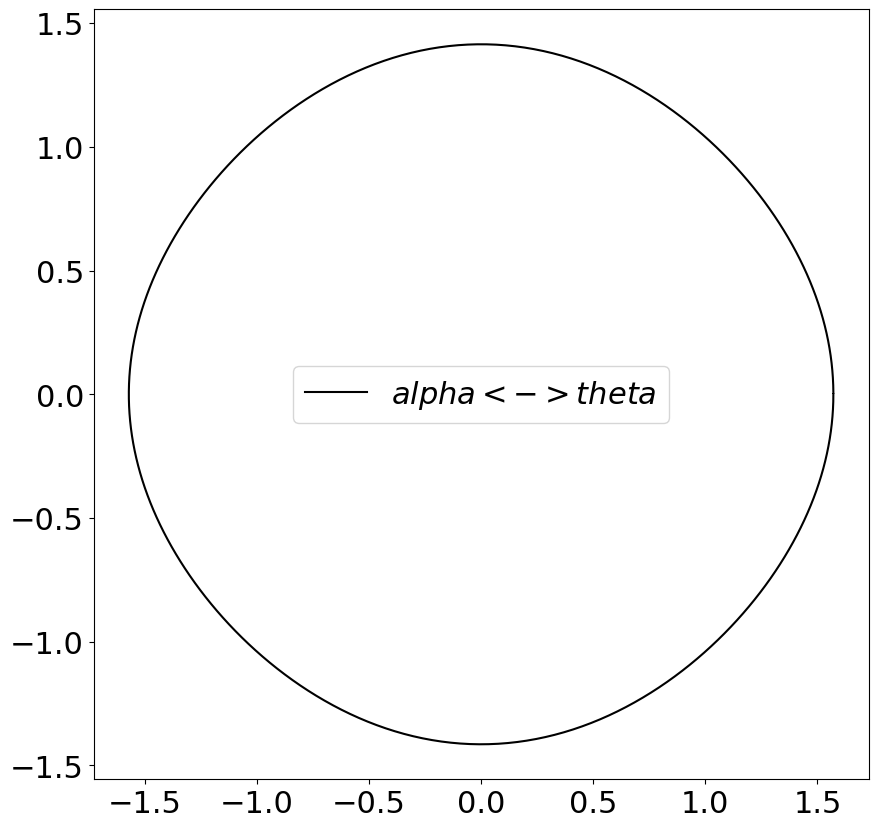

In [138]:
dt = 0.01
T = 4 * 1.854074677301372
t = np.arange(0.0 , T , dt)

result = solver1(t,dt)
a = np.array(list(map( lambda x : x[0] ,result)))  
b = np.array(list(map( lambda x : x[1] ,result))) 
print(a[-1],b[-1])
plt.figure(figsize=(10, 10))
# plt.plot(t , a ,color='red',linestyle='dashed',
#      linewidth=2, markersize=12 , label='$alpha$')
# plt.plot(t , b ,color='blue',linestyle='dashed',
#      linewidth=2, markersize=12 , label='$theta$')


plt.figure(figsize=(10, 10))
plt.plot(a , b , 'k-', ms=15, label='$alpha<->theta$')
plt.legend()

### Экспериментальная оценка сходимости метода Аддамса для первой задачи:
Кажется , что сходимость ошибки линейная по шагу dt

[0.1, 0.01, 0.001, 0.0001, 1e-05]


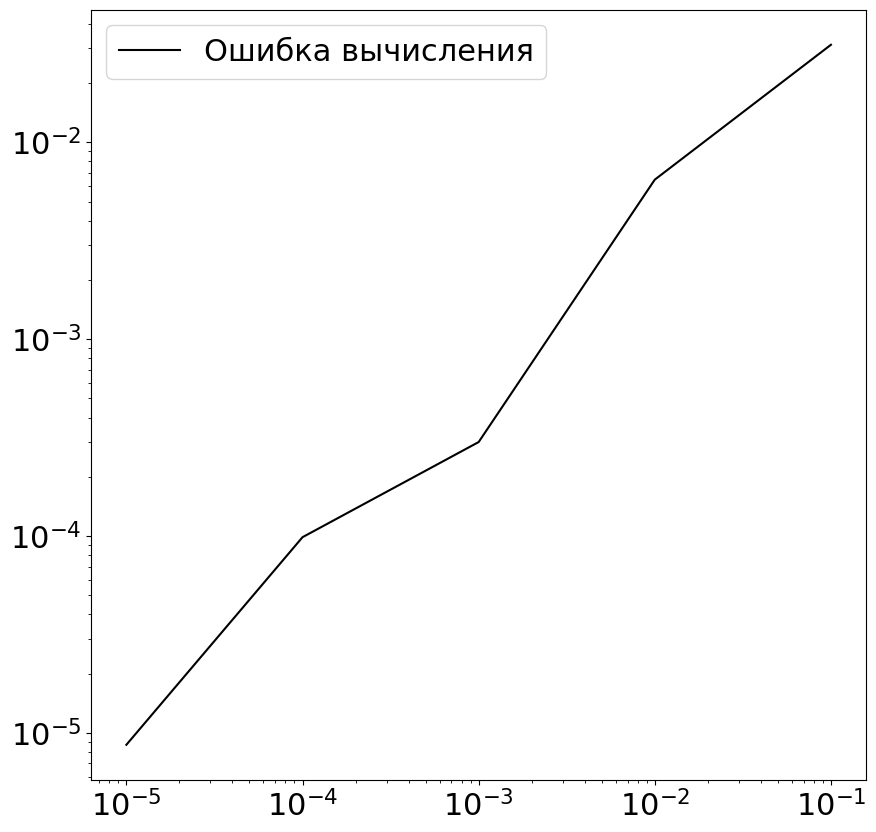

In [142]:
steps = [10**(-i) for i in range(1,6)]
print(steps)
T = 4*1.854074677301372
error = []
for dt in steps :
    t = np.arange(0.0 , T , dt)
    y = solver1(t,dt)
    error.append( np.sqrt((y[-1][0]-np.pi/2)**2+y[-1][1]**2)   )
plt.figure(figsize=(10, 10))
plt.loglog(steps , error , 'k-', ms=15, label='Ошибка вычисления')
plt.legend()
    
    

### Найдем максимальный шаг сходимости экспериментально 


Видим, что расходимость начинает происходить между 0.8 и 0.9 

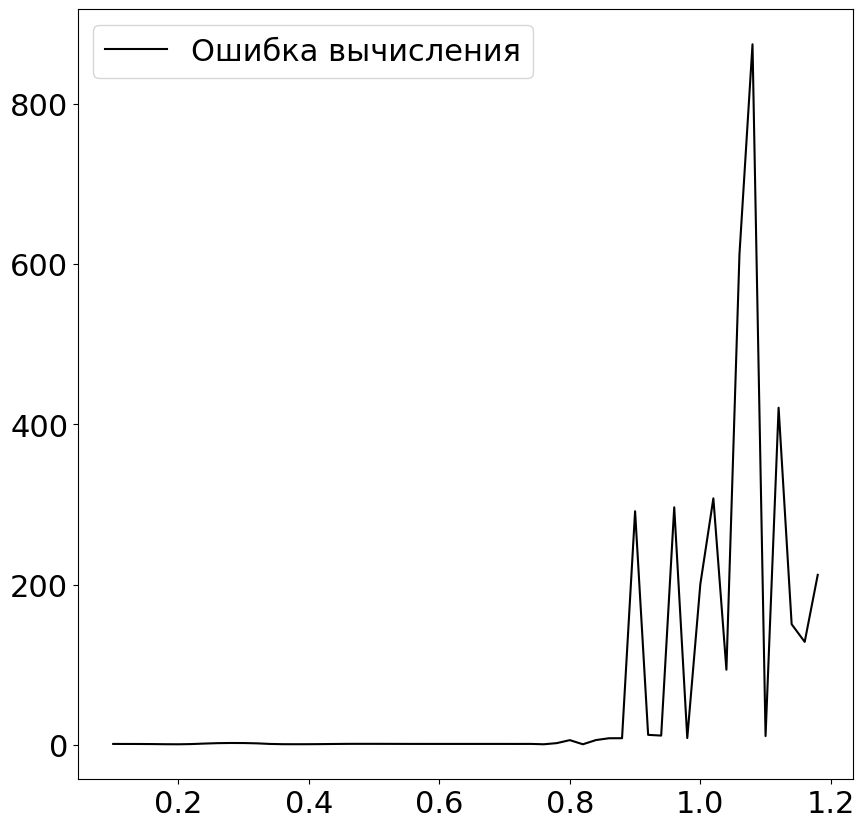

In [146]:
steps = np.arange(0.1,1.2,0.02)
T = 10*4*1.854074677301372
error = []
for dt in steps :
    t = np.arange(0.0 , T , dt)
    y = solver1(t,dt)
    error.append( np.sqrt((y[-1][0]-np.pi/2)**2+y[-1][0]**2)   )
plt.figure(figsize=(10, 10))
plt.plot(steps , error , 'k-', ms=15, label='Ошибка вычисления')
plt.legend()

### Вторая задачка

In [4]:
def solver2(t,dt) :
    x = [1]
    y = [0]
    for j in range(2) :
        x.append( x[-1] + dt*y[-1])
        y.append(y[-1] - dt*x[-1]**3)
    for i in t[3:] :
        x.append( x[-1] + dt/12*(23*y[-1]-16*y[-2]+5*y[-3]))
        y.append(y[-1] + dt/12*(-23*x[-1]**3 + 16*x[-2]**3 -5*x[-3]**3))
    return (x,y)

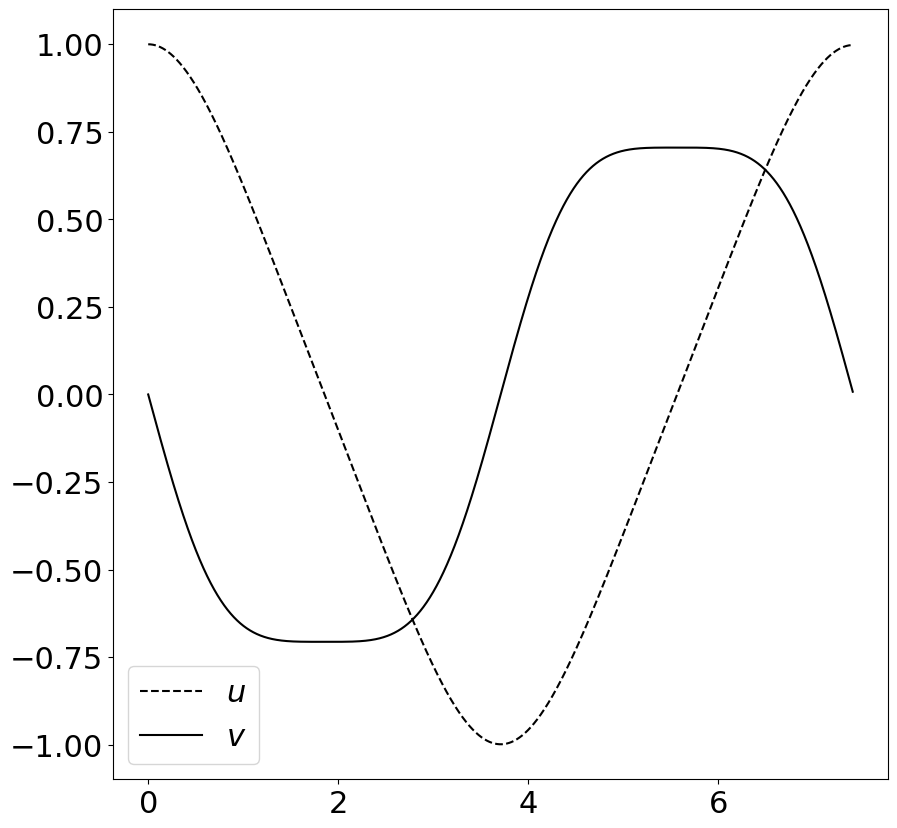

In [5]:
dt = 0.001
T = 7.416298709205487
t = np.arange(0.0 , T , dt)

(x,y) = solver2(t,dt)

plt.figure(figsize=(10, 10))
plt.plot(t , x , 'k--', ms=15, label='$u$')
plt.plot(t , y , 'k-', ms=15, label='$v$')
# plt.plot(x , y , 'k-', ms=15, label='$x<->y$')
plt.legend()

### Экспериментальная оценка сходимости метода Аддамса для второй задачи :

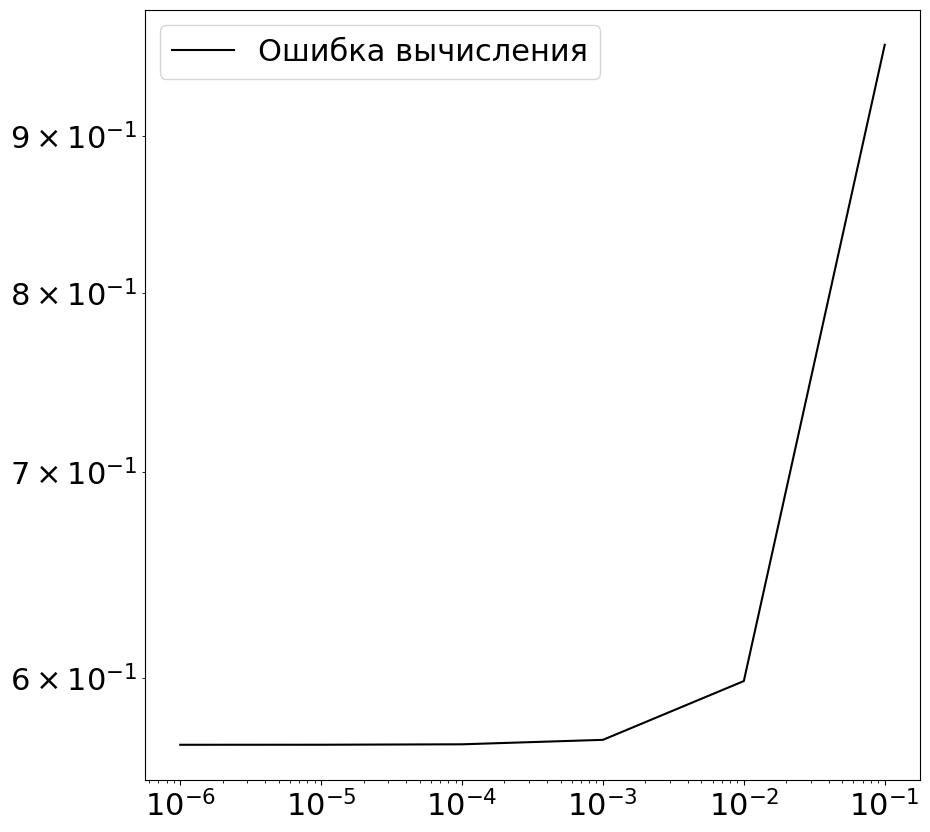

In [15]:
steps = [10**(-i) for i in range(1,7)]
T = 7.416298709205487
error = []
for dt in steps :
    t = np.arange(0.0 , T , dt)
    (x,y) = solver2(t,dt)
    error.append( np.sqrt((x[-1]-np.pi/2)**2+y[-1]**2)   )
plt.figure(figsize=(10, 10))
plt.loglog(steps , error , 'k-', ms=15, label='Ошибка вычисления')
plt.legend()
    
    

### 3 задачка

In [28]:
from scipy.optimize import fsolve

In [175]:
def f3(x,t):
    k = np.array([
        10**(-2)*max(0,np.sin(2*np.pi*t/t_d))    ,
        10**5,
        10**(-16)
    ])
    return np.array([
        k[0]*x[2]-k[1]*x[0]       ,
        k[0]*x[2]-k[2]*x[1]*x[3]  ,
        k[2]*x[1]*x[3]-k[0]*x[2]  ,
        k[1]*x[0]-k[2]*x[1]*x[3]    
    ])
def solver3(t,dt):
    y = [np.array([0,0,5*(10**11),8*(10**11)])]
    #Считаем первые 2 значения неявным методом Эйлера --> y[0] , y[1]
    for i in t[1:2]:
        y.append( fsolve(lambda x: x - y[-1] - dt*f3(x,i), y[-1]))
    # Применяем формулу диифференцирования назад 2го порядка
    for i in t[2:]:
        y.append( fsolve(lambda x: x - 4/3*y[-1] + 1/3*y[-2] - 2/3*dt*f3(x,i), y[-1]))
    
    return y

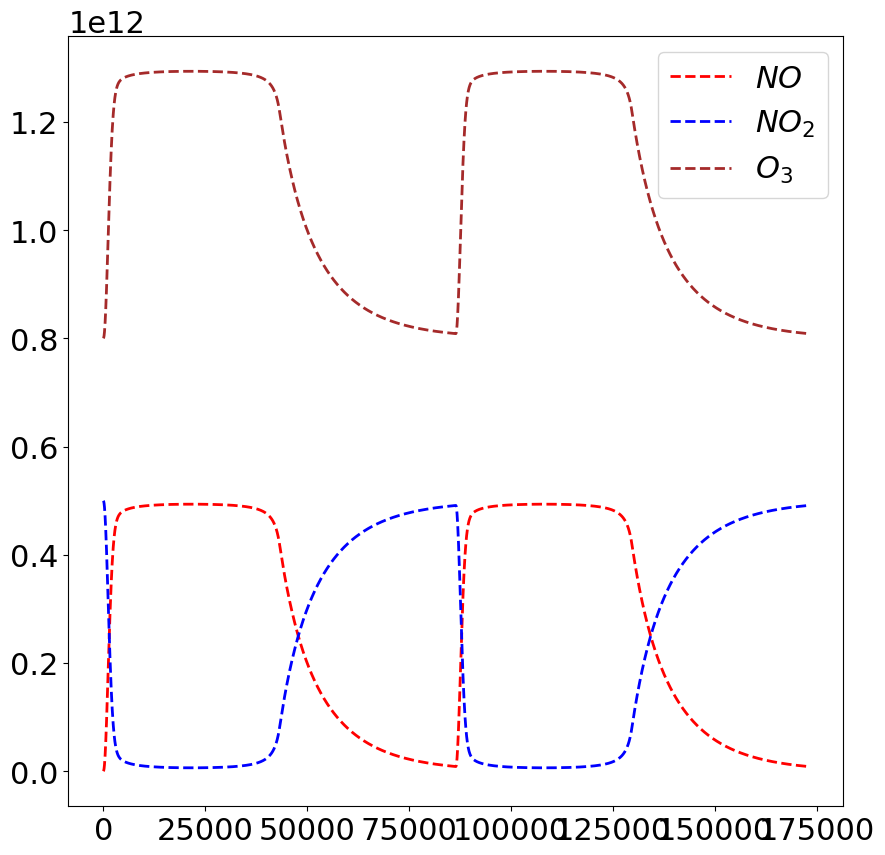

In [176]:
dt = 50
t_d = 24*60*60
T = 2*t_d
t = np.arange(0.0 , T , dt)

result = solver3(t,dt)

a = np.array(list(map( lambda x : x[0] ,result)))  
b = np.array(list(map( lambda x : x[1] ,result))) 
c = np.array(list(map( lambda x : x[2] ,result)))
d = np.array(list(map( lambda x : x[3] ,result)))
plt.figure(figsize=(10, 10))
plt.plot(t , b ,color='red',linestyle='dashed',
     linewidth=2, markersize=12 , label='$NO$')
plt.plot(t , c ,color='blue',linestyle='dashed',
     linewidth=2, markersize=12 , label='$NO_2$')
plt.plot(t , d ,color='brown',linestyle='dashed',
     linewidth=2, markersize=12 , label='$O_3$')
plt.legend()

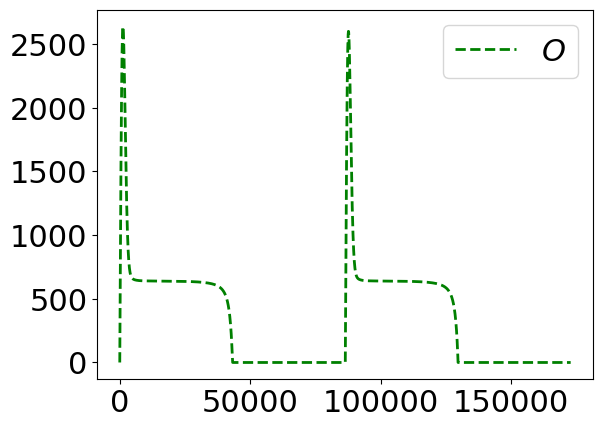

In [177]:
plt.plot(t , a ,color='green',linestyle='dashed',
     linewidth=2, markersize=12 ,label='$O$')
plt.legend()

Посмотрим на собственные числа матрицы $J$ в начальный момент времени $t$ = 0 

Как видим все числа в левой полуплоскости, которая лежит в области сходимости нашего второго метода

In [178]:
k = np.array([(10**(-2))*max(0,np.sin(0/t_d)) , 10**5, 10**(-16)])
c = np.array([ 0, 0, 5*(10**11), 8*(10**11)])
J = np.matrix([[-k[1],0,k[0],0] , [0,-k[2]*c[3],k[0],-k[2]*c[1]] , [0,k[2]*c[3],-k[0],-k[2]*c[1]] , [k[1],-k[2]*c[3],0,-k[2]*c[1]]])
np.linalg.eigvals(J)

array([-0.e+00, -1.e+05, -0.e+00, -8.e-05])

In [189]:
dt = np.arange(1e6,1e7,1e6)
t_d = 24*60*60
#1e4 периодов
T = 1e4*t_d


for i in dt : 
    t = np.arange(0.0 , T , i)
    result = solver3(t,i)
    print("Относительная ошибка :", np.linalg.norm(result[-1]- result[0] , ord = 2)/np.linalg.norm(result[0] , ord = 2))
    # print(result[-1] , result[0])

# a = np.array(list(map( lambda x : x[0] ,result)))  
# b = np.array(list(map( lambda x : x[1] ,result))) 
# c = np.array(list(map( lambda x : x[2] ,result)))
# d = np.array(list(map( lambda x : x[3] ,result)))
# plt.figure(figsize=(10, 10))
# plt.plot(t , b ,color='red',linestyle='dashed',
#      linewidth=2, markersize=12 , label='$NO$')
# plt.plot(t , c ,color='blue',linestyle='dashed',
#      linewidth=2, markersize=12 , label='$NO_2$')
# plt.plot(t , d ,color='brown',linestyle='dashed',
#      linewidth=2, markersize=12 , label='$O_3$')

# plt.legend()

Относительная ошибка : 10.502965778842718
Относительная ошибка : 1.821917524509904
Относительная ошибка : 1.609102310824568
Относительная ошибка : 12.332948859514724
Относительная ошибка : 9.63519552792264e-06
Относительная ошибка : 116.99838215429867
Относительная ошибка : 3.0018223613433204
Относительная ошибка : 9.191745902895574
Относительная ошибка : 15.396534406124252


Как видим на порядках шага больше 1e5 возникает относительная ошибка больше единицы, значит максимальный шаг устойчивости порядка 10e5